In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import pickle
import re

In [2]:
grade=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
grade

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


## EDA and Data Manipulation

In [3]:
grade.fillna('Missing',inplace=True)
grade.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

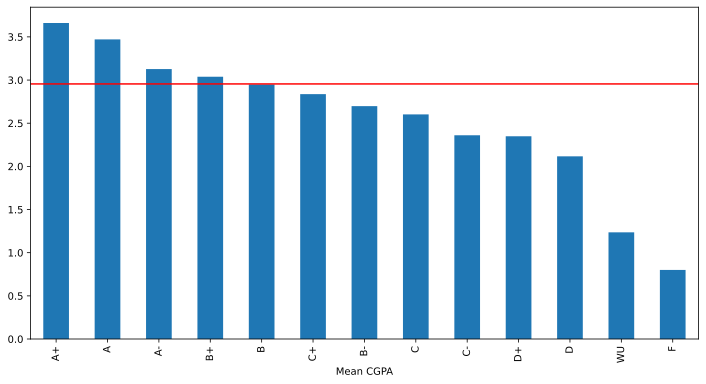

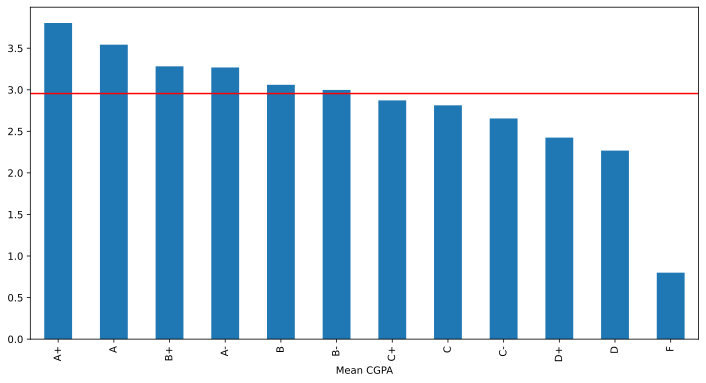

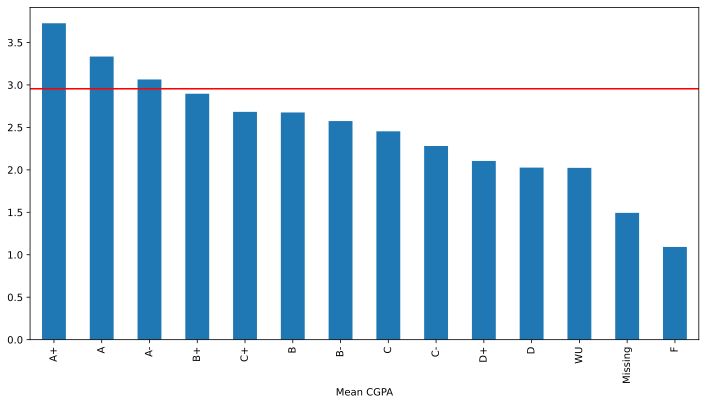

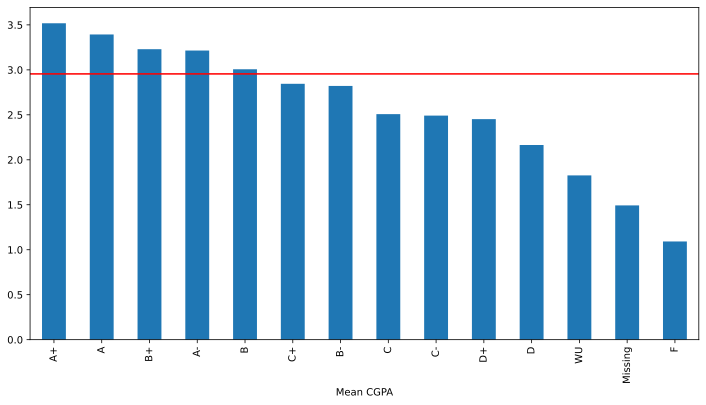

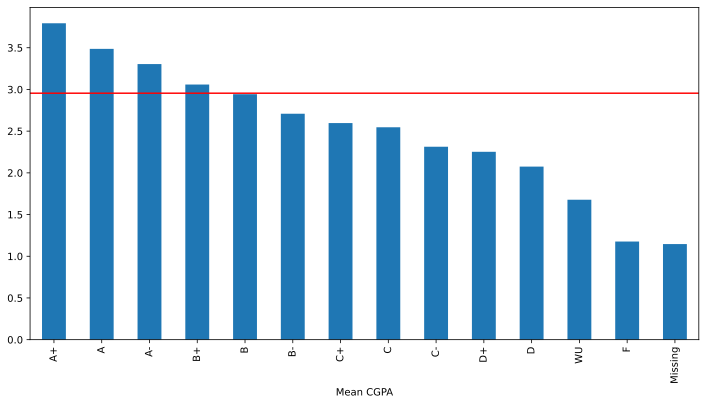

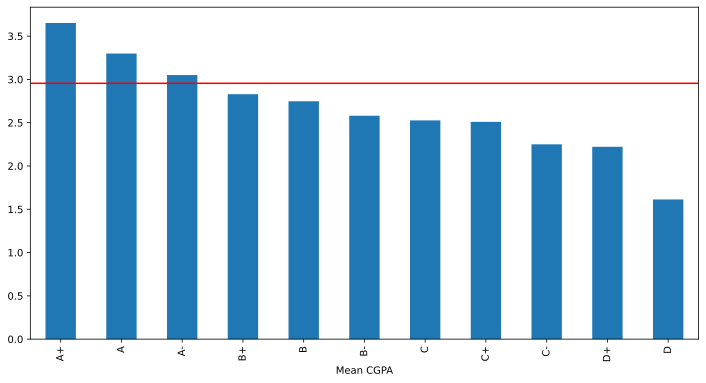

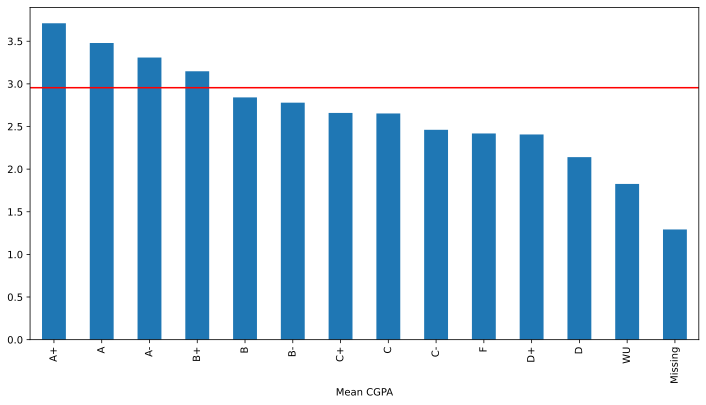

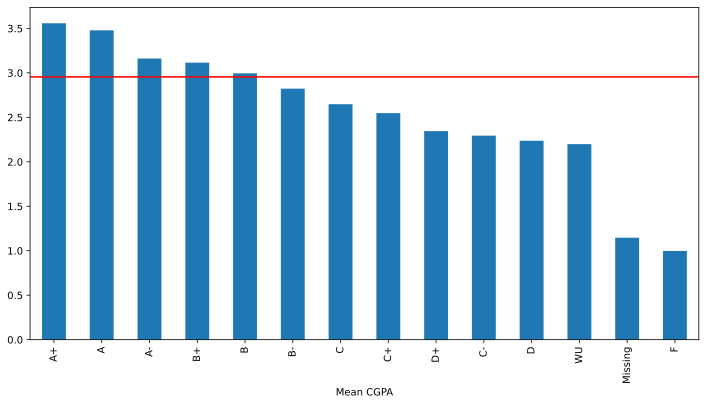

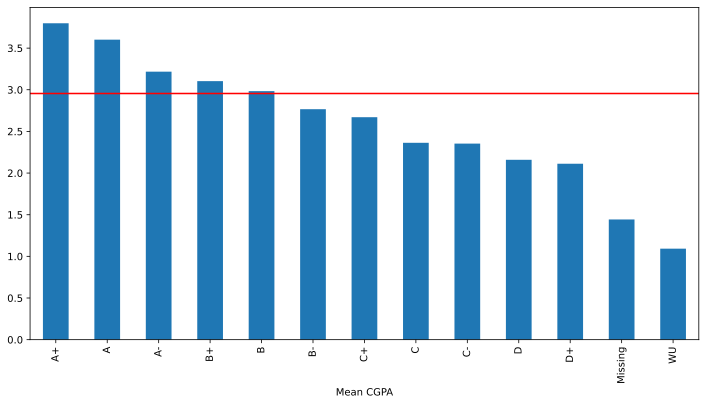

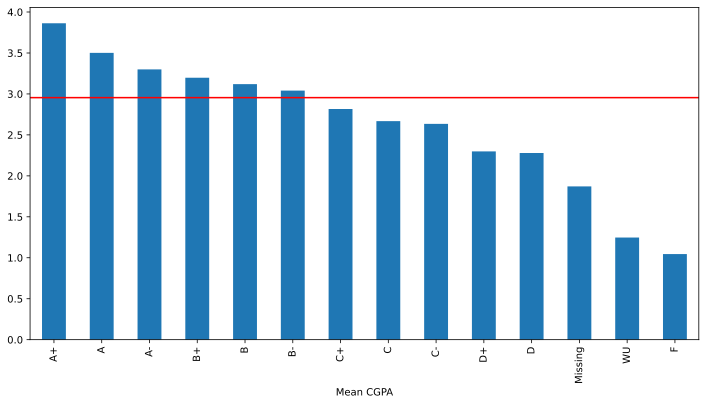

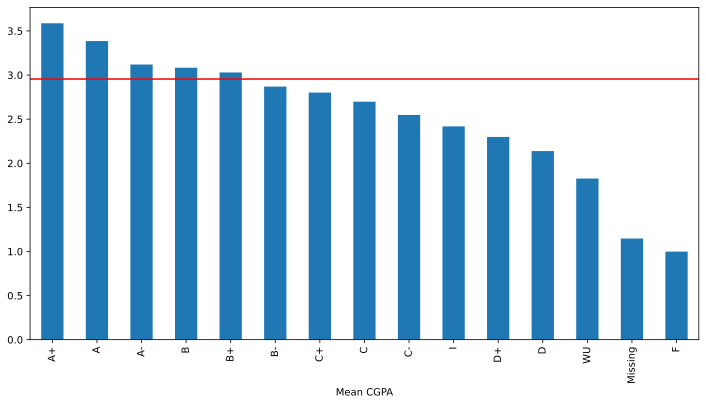

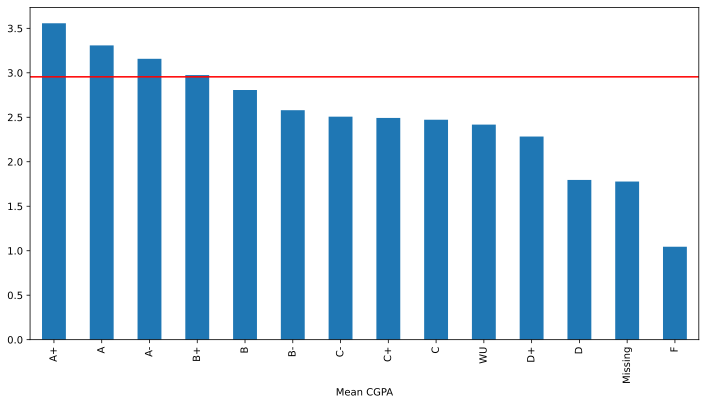

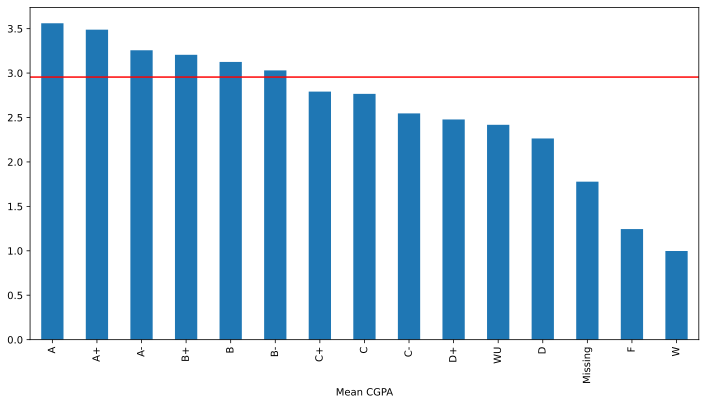

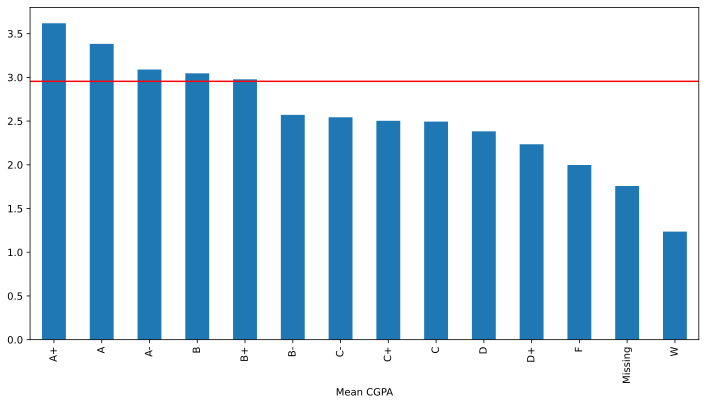

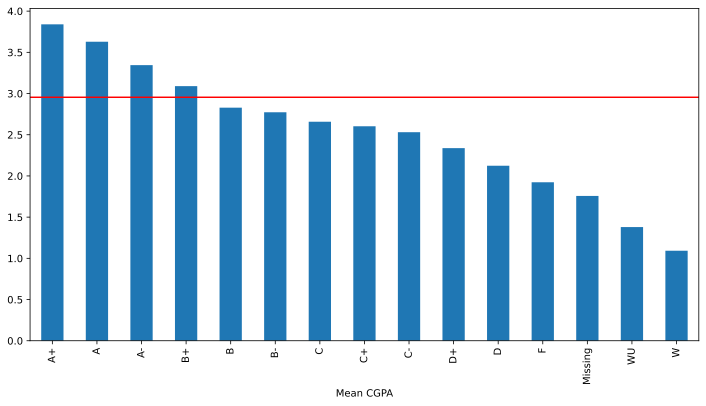

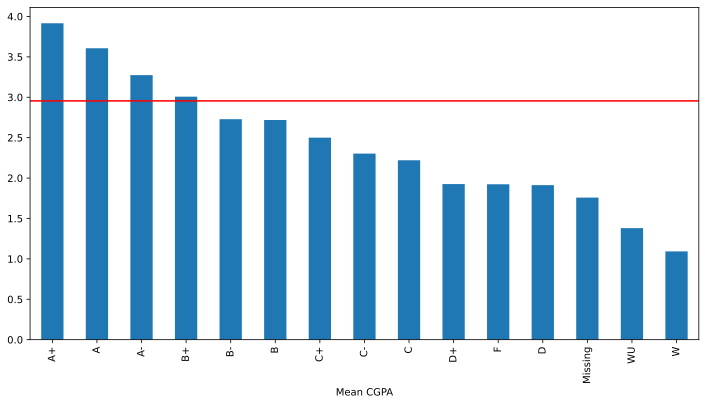

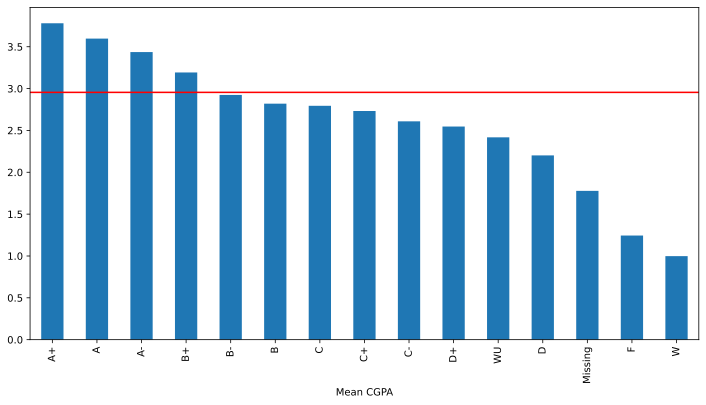

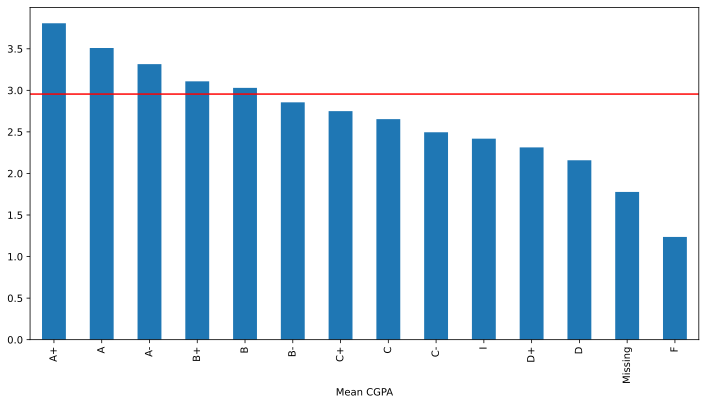

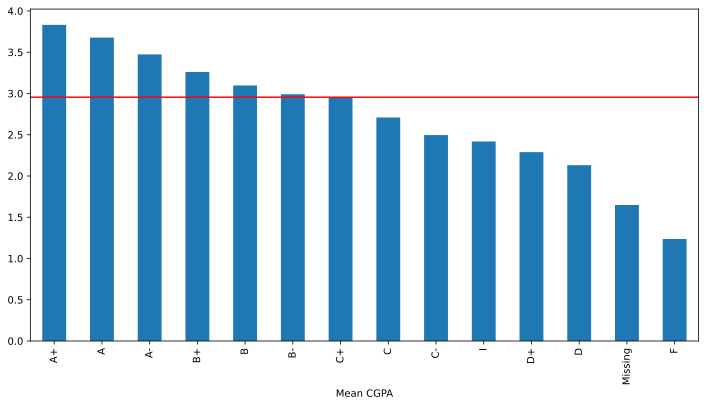

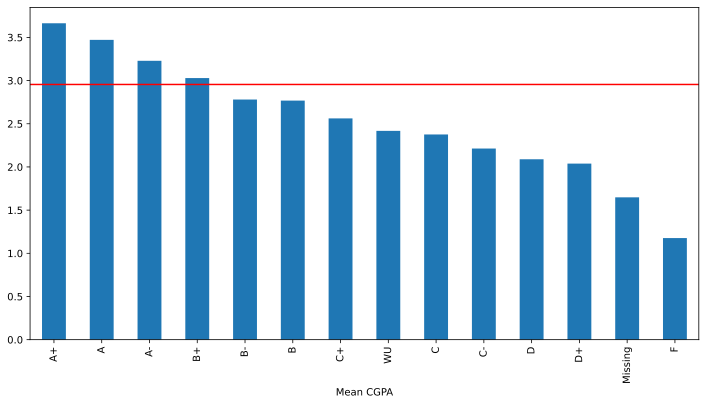

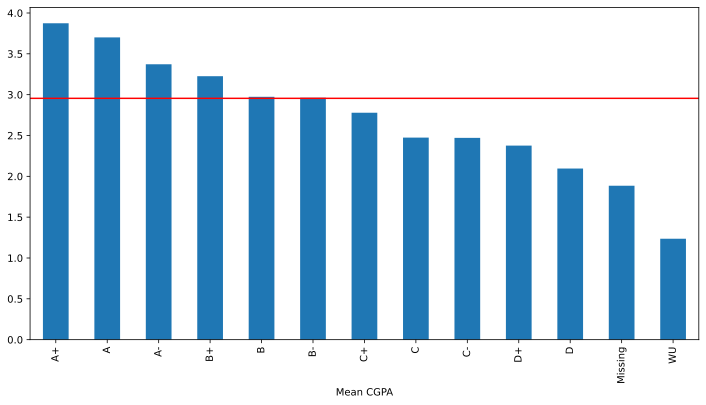

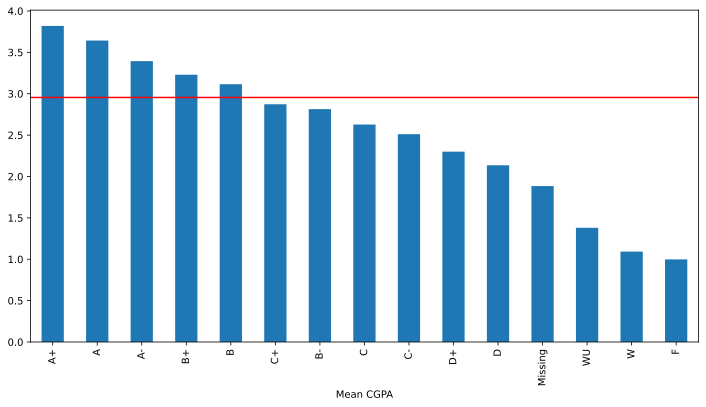

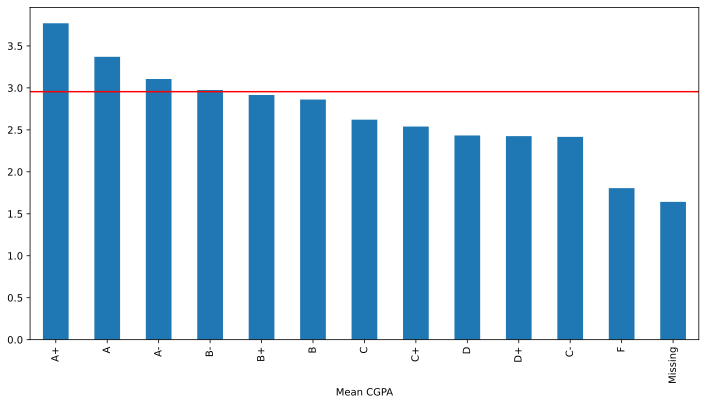

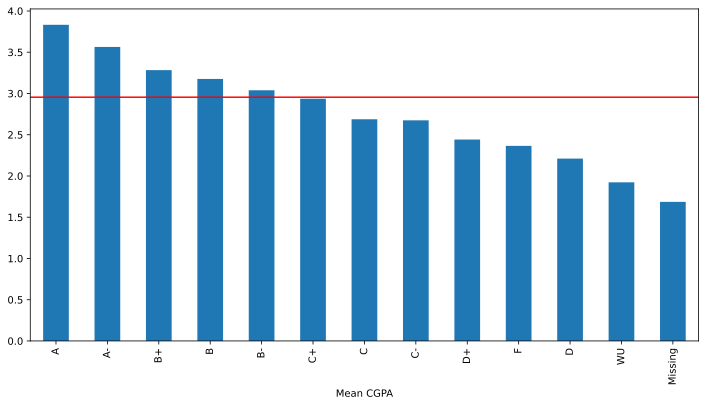

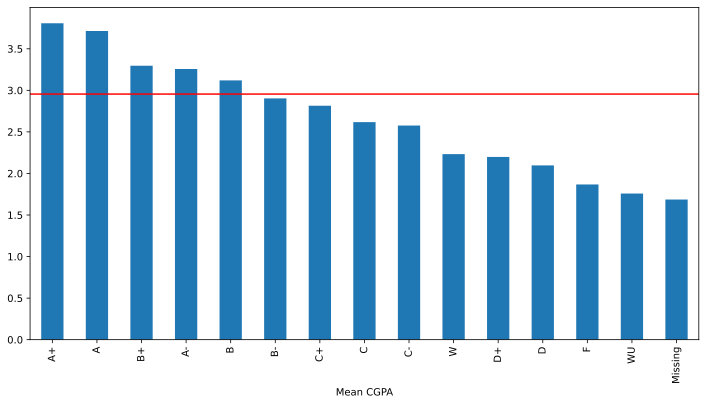

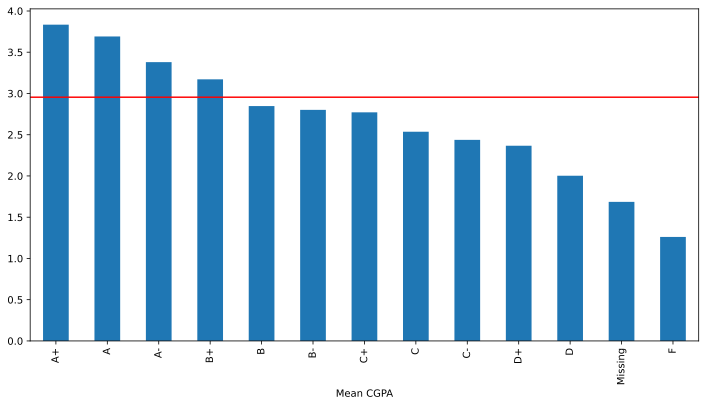

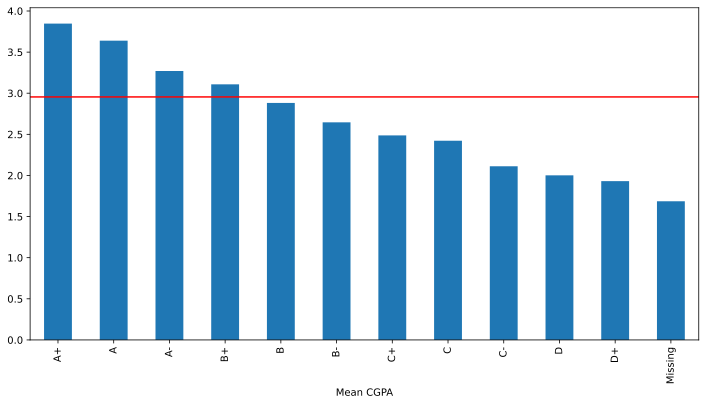

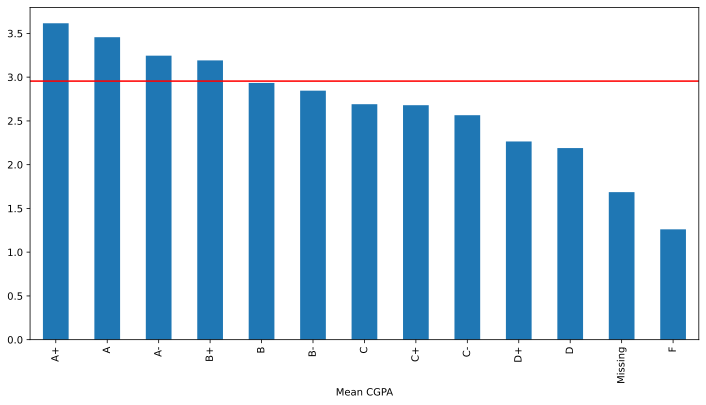

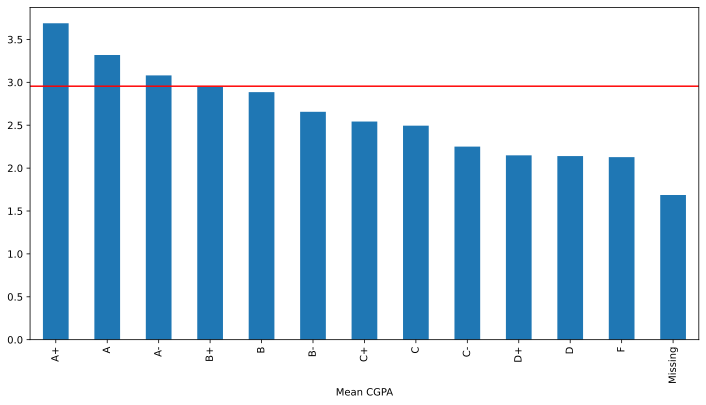

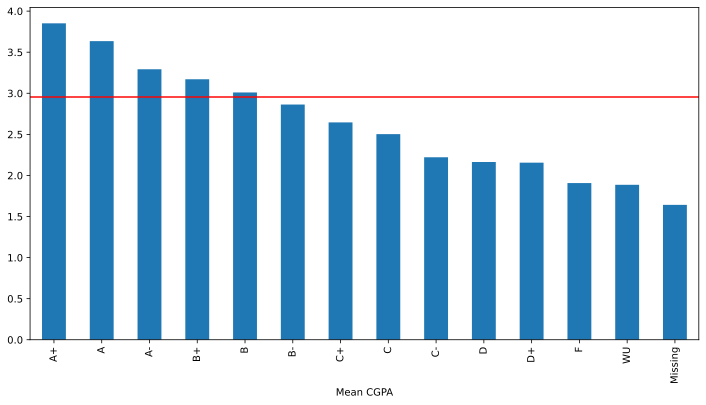

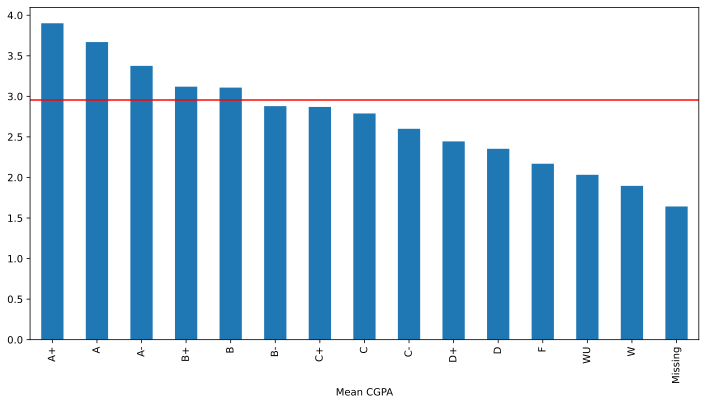

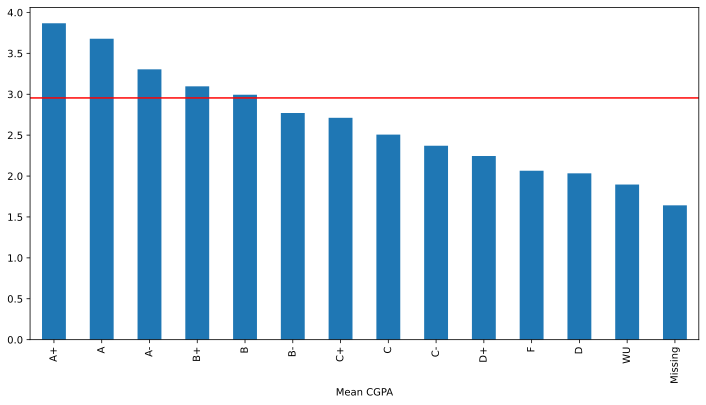

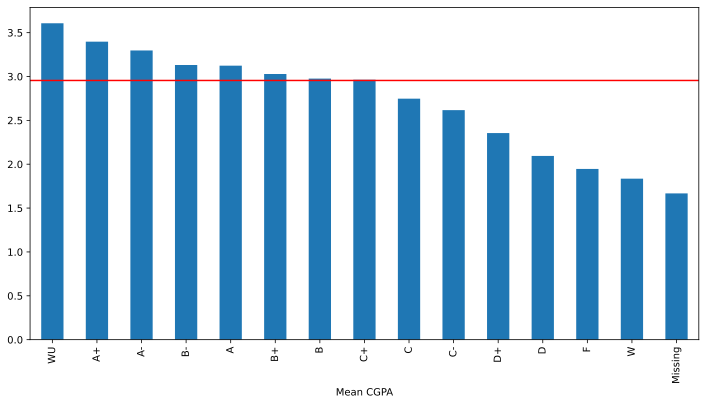

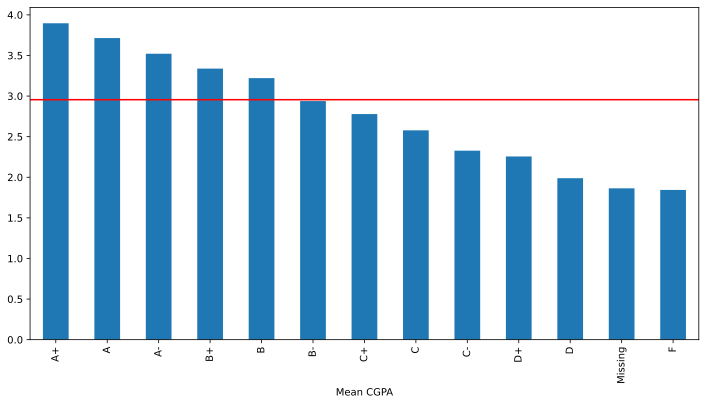

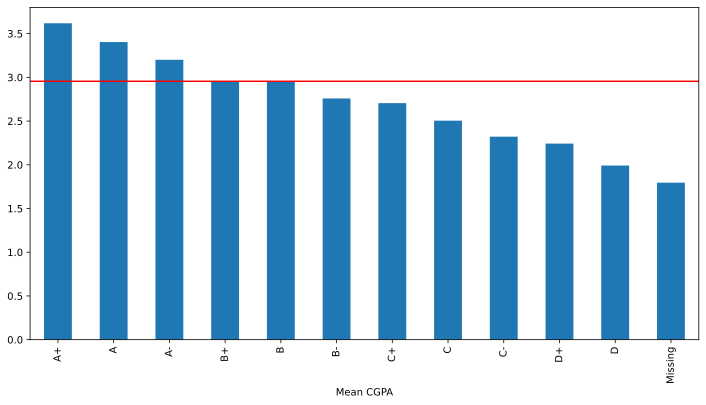

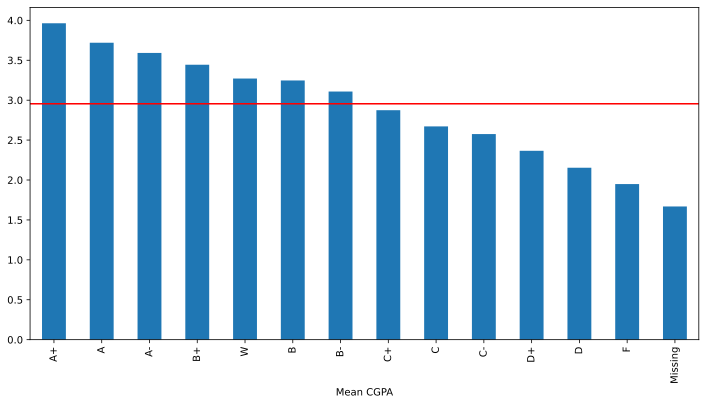

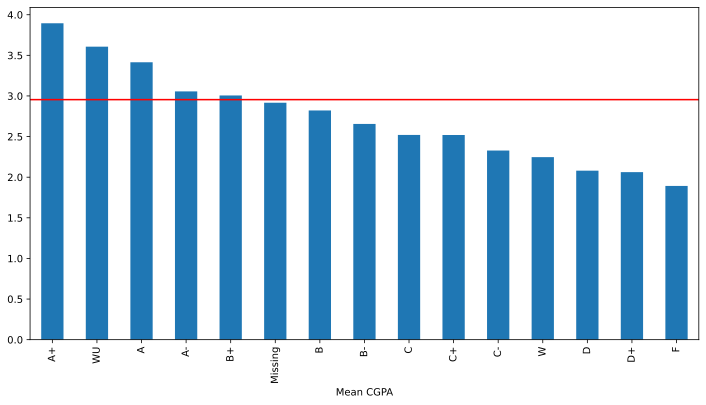

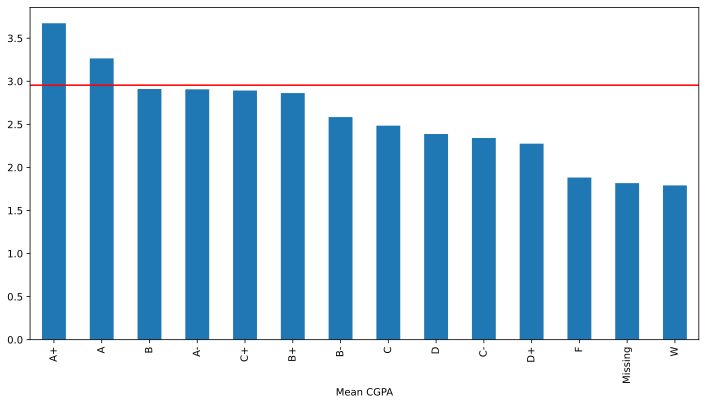

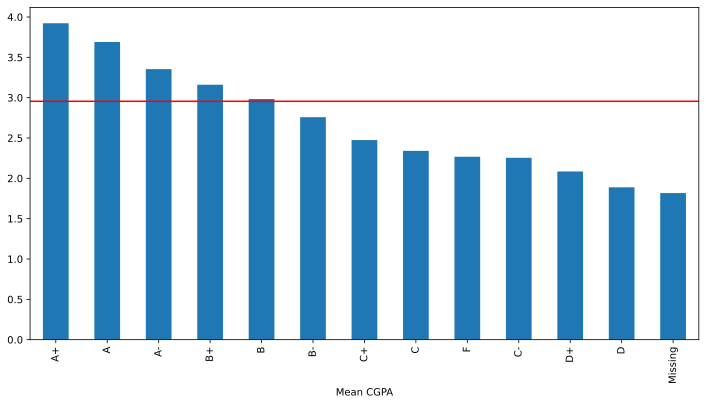

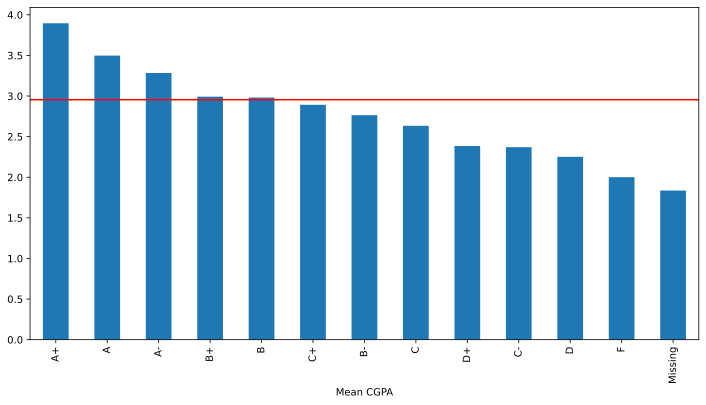

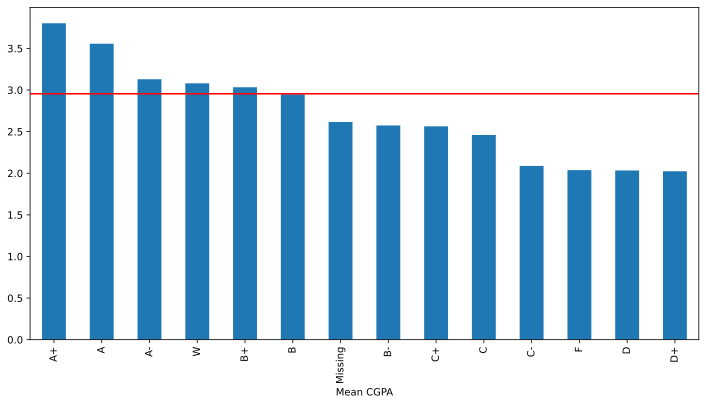

In [4]:
features,target=grade.drop(columns=['CGPA','Seat No.']),grade.CGPA
for col in features.columns.values:
    plt.figure(figsize=(12,6))
    grade.groupby(col)['CGPA'].mean().sort_values(ascending=False).plot.bar()
    plt.axhline(grade.CGPA.mean(),
                color='r')
    plt.xlabel('Mean CGPA')
    plt.show()

## Feature Engineering

In [5]:
model_df=grade.copy()['CGPA']
for col in grade.drop(columns=['Seat No.','CGPA']).columns.values:
    dummy_df=pd.get_dummies(grade[col],
                drop_first=True,
                prefix=col).astype(np.int64)
    model_df=pd.concat([model_df,dummy_df],
              axis=1,
              join='inner')
model_df

,CGPA,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,PH-121_D,...,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_Missing,CS-412_W
0,2.205,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.608,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.906,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,3.448,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.798,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,3.772,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,3.470,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,2.193,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
pattern=re.compile('_Missing')
columns_to_remove=[]
for col in model_df.drop(columns=['CGPA'],axis=1).columns.values:
    if pattern.search(string=col)!=None:
        columns_to_remove.append(col)

model_df.drop(columns=columns_to_remove,axis=1,inplace=True)
low_value_columns=[]
for col in model_df.columns.values:
    if model_df[col].mean()*100<1:
        low_value_columns.append(col)
model_df.drop(columns=low_value_columns,axis=1,inplace=True)
model_df

,CGPA,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,PH-121_D,...,CS-423_D+,CS-412_A-,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D+,CS-412_F
0,2.205,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2.008,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3.608,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.906,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3.448,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.798,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,3.772,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
568,3.470,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
569,2.193,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


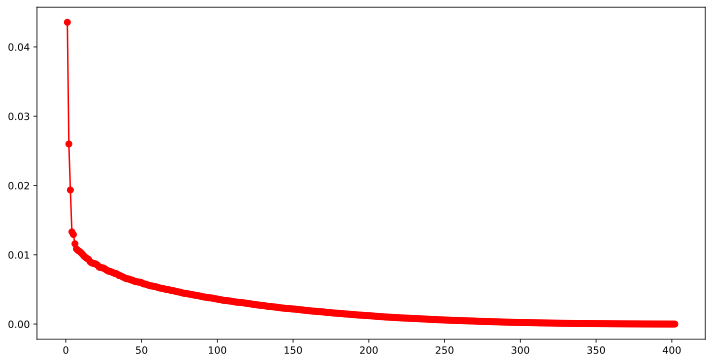

In [7]:
X,y=model_df.drop(columns=['CGPA'],axis=1),model_df.CGPA
pca=PCA()

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=30)
X_train_pca=pca.fit_transform(X_train)
explained_variance_ratio=pca.explained_variance_ratio_
pc_no=np.linspace(start=1,stop=pca.n_components_,num=402).astype(np.int64)

plt.figure(figsize=(12,6))
plt.plot(pc_no,
         explained_variance_ratio,
         'ro-')
plt.show()

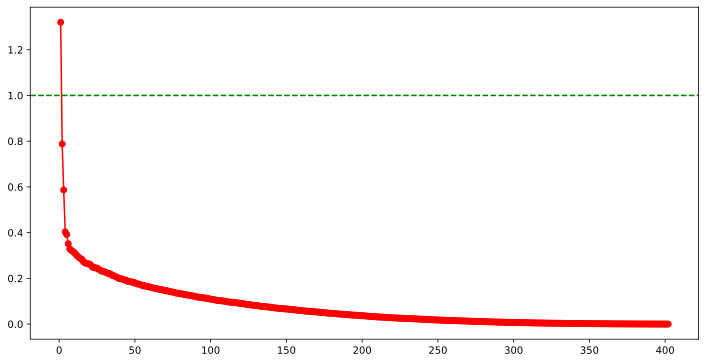

In [8]:
explained_variance_ratio=pca.explained_variance_
pc_no=np.linspace(start=1,stop=pca.n_components_,num=402).astype(np.int64)

plt.figure(figsize=(12,6))
plt.plot(pc_no,
         explained_variance_ratio,
         'ro-')
plt.axhline(y=1,
            color='g',
            linestyle='--')
plt.show()

In [9]:
n_components=6
pca=PCA(n_components=n_components)

X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

## Model building

In [10]:
score_diff_dict={}
for i in range(1,1000,1):
    model=RandomForestRegressor(random_state=i)
    cv_score=cross_val_score(estimator=model,
                             X=X_train_pca,
                             y=y_train,
                             scoring='neg_mean_absolute_error',
                             cv=10,
                             n_jobs=-1).mean()
    model.fit(X=X_train_pca,
              y=y_train)
    test_score=mean_absolute_error(y_pred=model.predict(X_test_pca),
                                   y_true=y_test)
    score_diff_dict[i]=abs(test_score+cv_score)
best_rs=min(score_diff_dict,key=score_diff_dict.get)
best_rs

274

In [11]:
# Random forest model
model=RandomForestRegressor(random_state=best_rs)
cv_score=cross_val_score(estimator=model,
                             X=X_train_pca,
                             y=y_train,
                             scoring='neg_mean_absolute_error',
                             cv=10,
                             n_jobs=-1).mean()

model.fit(X=X_train_pca,
          y=y_train)

y_pred=model.predict(X=X_test_pca)

test_score=mean_absolute_error(y_true=y_test,
                        y_pred=y_pred)
print('Test score:', test_score)
print('Cross val score:',cv_score*-1)
print('Model score:',abs(test_score+cv_score))

Test score: 0.08046773913043466
Cross val score: 0.09899353188405806
Model score: 0.0185257927536234


In [12]:
# Gradient boosting model
model=GradientBoostingRegressor(random_state=best_rs)
cv_score=cross_val_score(estimator=model,
                             X=X_train_pca,
                             y=y_train,
                             scoring='neg_mean_absolute_error',
                             cv=10,
                             n_jobs=-1).mean()

model.fit(X=X_train_pca,
          y=y_train)

y_pred=model.predict(X=X_test_pca)

test_score=mean_absolute_error(y_true=y_test,
                        y_pred=y_pred)
print('Test score:', test_score)
print('Cross val score:',cv_score*-1)
print('Model score:',abs(test_score+cv_score))

Test score: 0.08675586234143585
Cross val score: 0.10885122590711435
Model score: 0.022095363565678497


In [13]:
# Linear regression model
model=LinearRegression()
cv_score=cross_val_score(estimator=model,
                             X=X_train_pca,
                             y=y_train,
                             scoring='neg_mean_absolute_error',
                             cv=10,
                             n_jobs=-1).mean()

model.fit(X=X_train_pca,
          y=y_train)

y_pred=model.predict(X=X_test_pca)

test_score=mean_absolute_error(y_true=y_test,
                        y_pred=y_pred)
print('Test score:', test_score)
print('Cross val score:',cv_score*-1)
print('Model score:',abs(test_score+cv_score))

Test score: 0.14162801975504405
Cross val score: 0.16438321855780708
Model score: 0.022755198802763027


In [14]:
selected_model=RandomForestRegressor(random_state=best_rs)
selected_model.fit(X=X_train_pca,
                   y=y_train)
with open('./selected_model.pkl','wb') as f:
    pickle.dump(file=f,obj=selected_model)

In [15]:
with open(file='./selected_model.pkl', mode='rb') as f:
    selected_model = pickle.load(file=f)
selected_model.predict(X_test_pca)

array([3.40592, 3.6811 , 3.37845, 3.84219, 3.13747, 3.36714, 2.11186,
       3.36385, 3.21979, 3.17237, 2.78849, 3.83763, 2.01327, 2.27023,
       3.55254, 2.77841, 2.78424, 3.65299, 3.48827, 3.72322, 2.73255,
       3.30934, 3.77221, 3.16712, 3.46345, 3.76476, 3.78139, 3.39093,
       2.0192 , 3.24132, 3.68093, 2.4358 , 3.72341, 3.21895, 2.73695,
       2.43042, 3.53438, 3.20903, 3.18211, 2.39954, 2.14707, 2.97041,
       3.83077, 3.27254, 3.6969 , 2.72823, 2.91091, 2.98939, 2.93934,
       2.74085, 3.66978, 3.13165, 2.59008, 2.92079, 2.74633, 2.85074,
       3.00334, 2.97119, 3.2365 , 2.34846, 3.12993, 2.86068, 3.1111 ,
       3.3629 , 3.92696, 3.17087, 2.6858 , 1.785  , 2.30081, 3.65475,
       1.91538, 2.33191, 3.09782, 2.70168, 3.31619, 3.72354, 2.54358,
       2.46836, 2.38001, 3.36261, 3.28279, 3.35944, 3.59249, 3.74426,
       2.86248, 3.4578 , 3.09857, 1.96868, 3.65338, 2.98987, 3.37025,
       2.72944, 2.01895, 3.57799, 3.38358, 3.87568, 2.28523, 3.77602,
       3.77184, 2.72